In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/homeprices.csv")

In [3]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


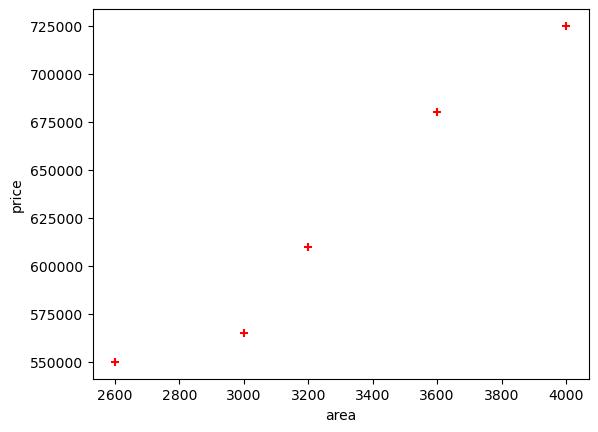

In [4]:
plt.xlabel('area')
plt.ylabel('price')

plt.scatter(df.area, df.price, color='red', marker='+')

In [5]:
# linear model

In [6]:
new_df = df.drop('price', axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [7]:
model = linear_model.LinearRegression()
model.fit(new_df, df.price)

LinearRegression()

In [8]:
model.predict([[3300]])

/home/kashiii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [9]:
model.predict([[5000]])

/home/kashiii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [10]:
model.coef_

array([135.78767123])

In [11]:
model.intercept_

180616.43835616432

In [12]:
#  How does the above model work

# y = m * x + b

135.78767123 * 5000 + 180616.43835616432

859554.7945061643

In [13]:
area_df = pd.read_csv("./data/areas.csv")
area_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [14]:
p = model.predict(area_df)

In [15]:
area_df['prices'] = p 

In [16]:
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [17]:
area_df.to_csv("./data/prediction.csv")

# Save the trained model

In [18]:
import pickle

In [19]:
with open('./data/model_pickle', 'wb') as file:
    pickle.dump(model, file)

In [20]:
# open the saved model

In [21]:
with open('./data/model_pickle', 'rb') as f:
    mp = pickle.load(f)

In [23]:
mp.coef_

array([135.78767123])

In [24]:
mp.intercept_

180616.43835616432

In [22]:
mp.predict([[5000]])

/home/kashiii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [26]:
# using joblib

# joblib -> objects which contains large numpy arrays

In [30]:
import joblib

In [31]:
joblib.dump(model, './data/model_joblib')

['./data/model_joblib']

In [32]:
mj = joblib.load('./data/model_joblib')

In [33]:
mj.coef_

array([135.78767123])

In [34]:
mj.intercept_

180616.43835616432

In [36]:
mj.predict([[5000]])

/home/kashiii/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])